In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [27]:
# Kernel function
def RBF_kernel(x1, x2, a_1 = 200.0, a_2 = 0.1):
    return a_1 * np.exp(-a_2 * 0.5* np.dot(x1-x2, x1-x2))

# Gaussian process
def pred(x, x_train, y_train, a_1 = 200, a_2 = 1):
    # Calculate the kernel matrix
    K = np.zeros((len(x_train), len(x_train)))
    for i in range(len(x_train)):
        for j in range(len(x_train)):
            K[i,j] = RBF_kernel(x_train[i], x_train[j], a_1, a_2)
    # Calculate the inverse of the kernel matrix
    K_inv = np.linalg.inv(K)
    # Calculate the kernel vector
    k = np.zeros(len(x_train))
    for i in range(len(x_train)):
        k[i] = RBF_kernel(x_train[i], x, a_1, a_2)
    # Calculate the mean and variance
    mu = np.dot(k, np.dot(K_inv, y_train))
    var = RBF_kernel(x, x, a_1, a_2) - np.dot(k, np.dot(K_inv, k))
    return mu, var

In [33]:
x = np.arange(-5, 5)
y = np.sin(x)

In [34]:
x_pred = 0.1
mu, var = pred(x_pred, x, y)

In [35]:
x_pred = np.arange(-5, 5, 0.01)

In [38]:
y_pred = np.zeros(len(x_pred))
y_std = np.zeros(len(x_pred))
for i in range(len(x_pred)):
    mu, var = pred(x_pred[i], x, y)
    y_pred[i] = mu
    y_std[i] = np.sqrt(var)

/var/folders/v9/ks1bt2jd7fq14x1k2xx9x7p40000gn/T/ipykernel_12593/2619879074.py:6: RuntimeWarning: invalid value encountered in sqrt
  y_std[i] = np.sqrt(var)


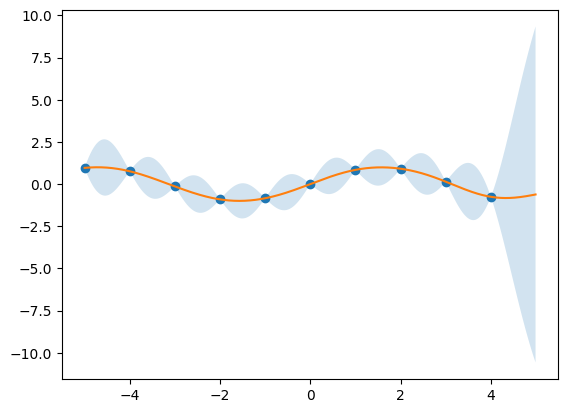

In [41]:
plt.plot(x, y, 'o')
plt.plot(x_pred, y_pred)
plt.fill_between(x_pred, y_pred - y_std, y_pred + y_std, alpha = 0.2, )
